In [58]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) #fixing font size

#Libraries for artificial neural network
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [59]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive #import drive from google colab

root = "/content/drive"     #default location for the drive

drive.mount(root)           #we mount the google drive at /content/drive

#import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

#path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
train_data = pd.read_csv(join(project_path,"rescaled_data/train_rescaled_data.csv"), sep=";")

In [61]:
#First inputs
target = train_data["rescaled_ame_BE"]
n_input = train_data["rescaled_N"]
z_input = train_data["rescaled_Z"]

#Liquid drop inputs
surf_input = train_data["rescaled_Surf"]
asym_input = train_data["rescaled_Asym"]
coul_input = train_data["rescaled_Coul"]
pair_input = train_data["rescaled_Pair"]

#Other inputs that may help
z_parity_input = train_data["rescaled_Z_parity"]
n_parity_input = train_data["rescaled_N_parity"]
z_distance_input = train_data["rescaled_Z_distance"]  
n_distance_input = train_data["rescaled_N_distance"]

In [62]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
input3=keras.layers.Input(shape=(1,))
input4=keras.layers.Input(shape=(1,))
input5=keras.layers.Input(shape=(1,))
input6=keras.layers.Input(shape=(1,))
input7=keras.layers.Input(shape=(1,))
input8=keras.layers.Input(shape=(1,))
input9=keras.layers.Input(shape=(1,))
input10=keras.layers.Input(shape=(1,))

merged = keras.layers.Concatenate()([input1, input2, input3, input4, input5, input6, input7, input8, input9, input10])
dense1 = keras.layers.Dense(128, input_dim=10, activation="relu")(merged)
dense2 = keras.layers.Dense(128, activation="relu")(dense1)
dense3 = keras.layers.Dense(128, activation="relu")(dense2)
dense4 = keras.layers.Dense(128, activation="relu")(dense3)
dense5 = keras.layers.Dense(128, activation="relu")(dense4)
dense6 = keras.layers.Dense(128, activation="relu")(dense5)
dense7 = keras.layers.Dense(128, activation="relu")(dense6)
dense8 = keras.layers.Dense(128, activation="relu")(dense7)
dense9 = keras.layers.Dense(128, activation="relu")(dense8)
dense10 = keras.layers.Dense(128, activation="relu")(dense9)
output = keras.layers.Dense(1, activation="relu")(dense10)
model4 = keras.models.Model(([input1, input2, input3, input4, input5, input6, input7, input8, input9, input10]),output)

In [63]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/150
104/104 [==============================] - 1s 4ms/step - loss: 0.1028
Epoch 2/150
104/104 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 3/150
104/104 [==============================] - 0s 4ms/step - loss: 3.2912e-04
Epoch 4/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4793e-04
Epoch 5/150
104/104 [==============================] - 0s 4ms/step - loss: 9.8231e-05
Epoch 6/150
104/104 [==============================] - 0s 4ms/step - loss: 6.8593e-05
Epoch 7/150
104/104 [==============================] - 0s 4ms/step - loss: 5.2467e-05
Epoch 8/150
104/104 [==============================] - 0s 4ms/step - loss: 4.1831e-05
Epoch 9/150
104/104 [==============================] - 0s 4ms/step - loss: 3.5186e-05
Epoch 10/150
104/104 [==============================] - 0s 4ms/step - loss: 2.8918e-05
Epoch 11/150
104/104 [==============================] - 0s 4ms/step - loss: 2.5703e-05
Epoch 12/150
104/104 [==============================] - 0s 4

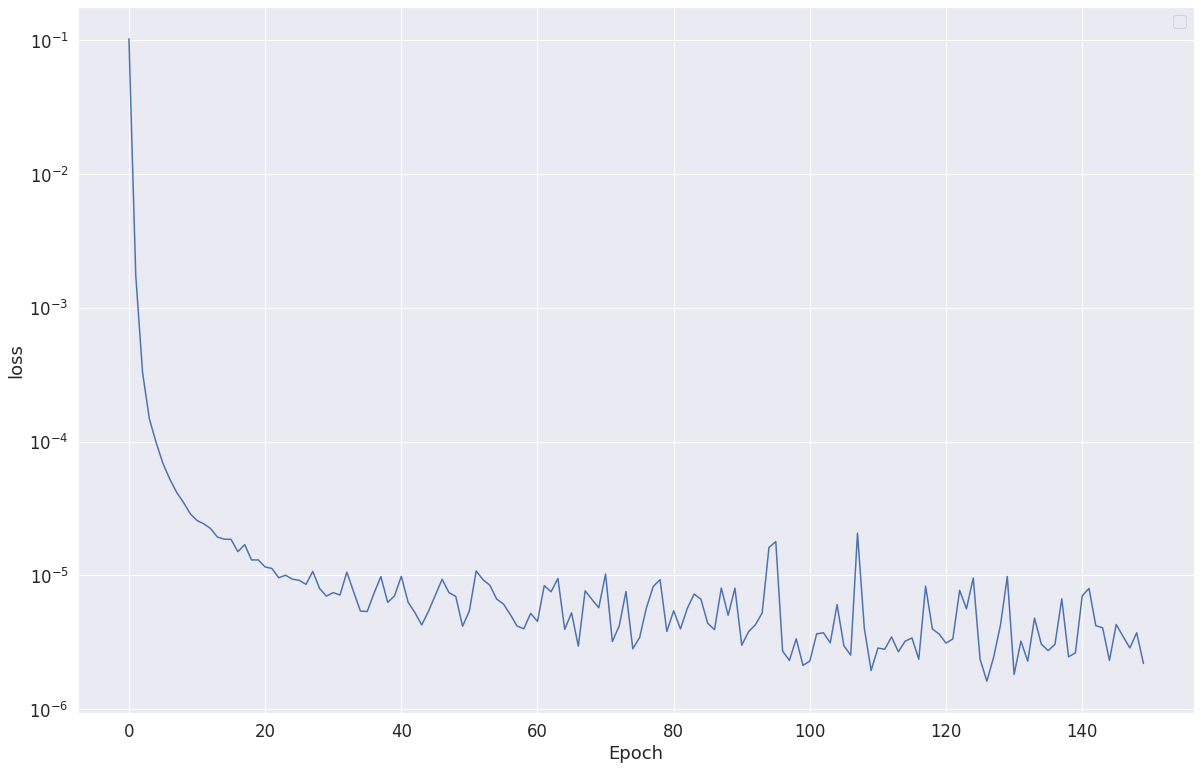

In [64]:
history4=model4.fit(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, n_parity_input, z_parity_input, n_distance_input, z_distance_input]), y=target, epochs=150, shuffle=True, verbose=1)


plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()
#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))

rescaled_data = pd.read_csv(join(project_path,"rescaled_data/rescaled_data.csv"), sep=";")

rescaled_target = scaler.fit_transform(pd.Series.to_numpy(rescaled_data["ame_BE"]).reshape(-1,1))

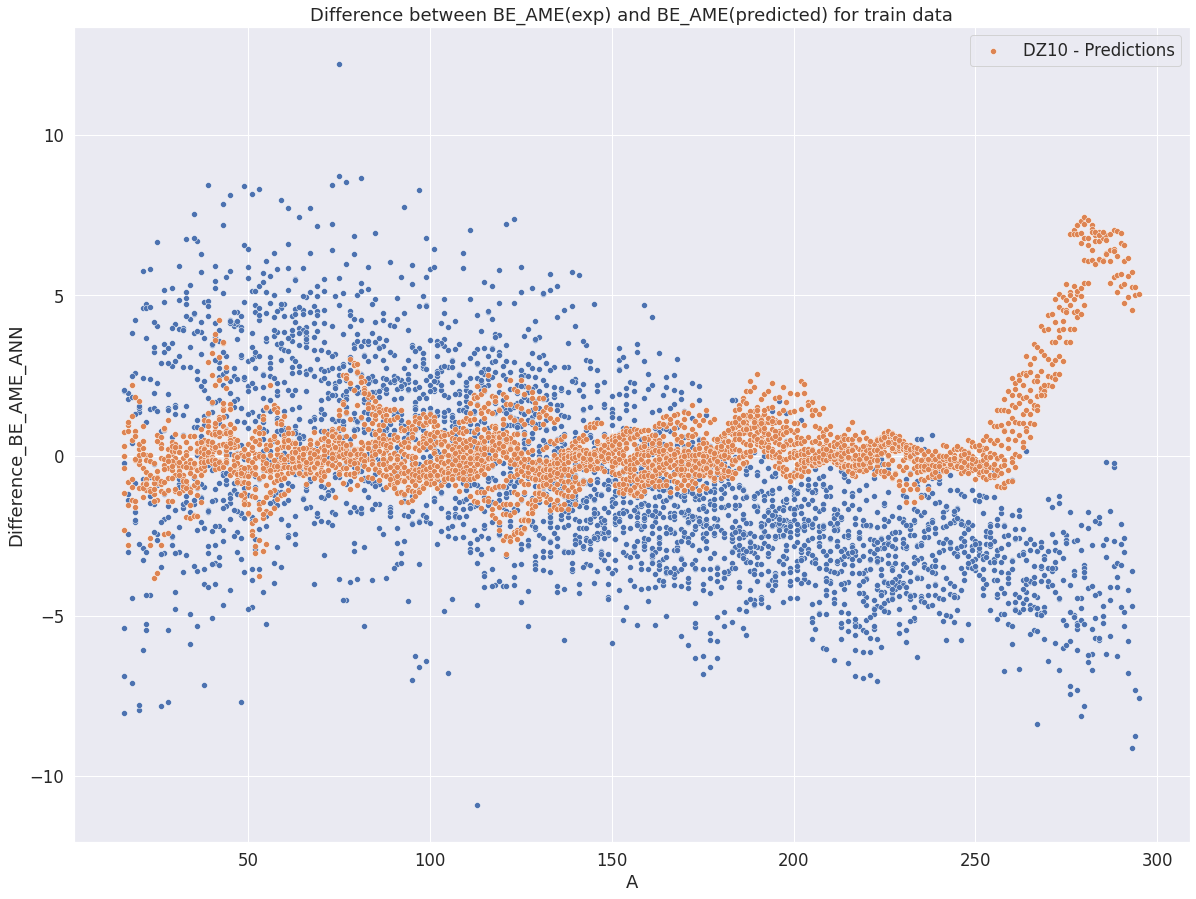

In [66]:
train_predictions = model4.predict(x=([n_input, z_input, surf_input, coul_input, asym_input, pair_input, n_parity_input, z_parity_input, n_distance_input, z_distance_input]), verbose=0)

train_rescaled_predictions = [(i - scaler.min_)/scaler.scale_ for i in train_predictions]


train_data["BE_Predictions"] = np.double(train_rescaled_predictions)
train_data["Difference_BE_AME_ANN"] = train_data["ame_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_AME"] = train_data["dz_BE"] - train_data["ame_BE"]

plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=train_data, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=train_data, palette="rainbow_r", label='DZ10 - Predictions')

In [67]:
rms_train = np.sqrt(((train_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(train_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_train)

RMS AME: 2.9523595630579975


In [68]:
validation_data = pd.read_csv(join(project_path,"rescaled_data/validation_rescaled_data.csv"), sep=";")

test_target = validation_data["rescaled_ame_BE"]
test_n_input = validation_data["rescaled_N"]
test_z_input = validation_data["rescaled_Z"]
test_coul_input = validation_data["rescaled_Coul"]
test_surf_input = validation_data["rescaled_Surf"]
test_asym_input = validation_data["rescaled_Asym"]
test_pair_input = validation_data["rescaled_Pair"]
test_z_parity_input = validation_data["rescaled_Z_parity"]
test_n_parity_input = validation_data["rescaled_N_parity"]
test_z_distance_input = validation_data["rescaled_Z_distance"]
test_n_distance_input = validation_data["rescaled_N_distance"]

6/6 [==============================] - 0s 5ms/step


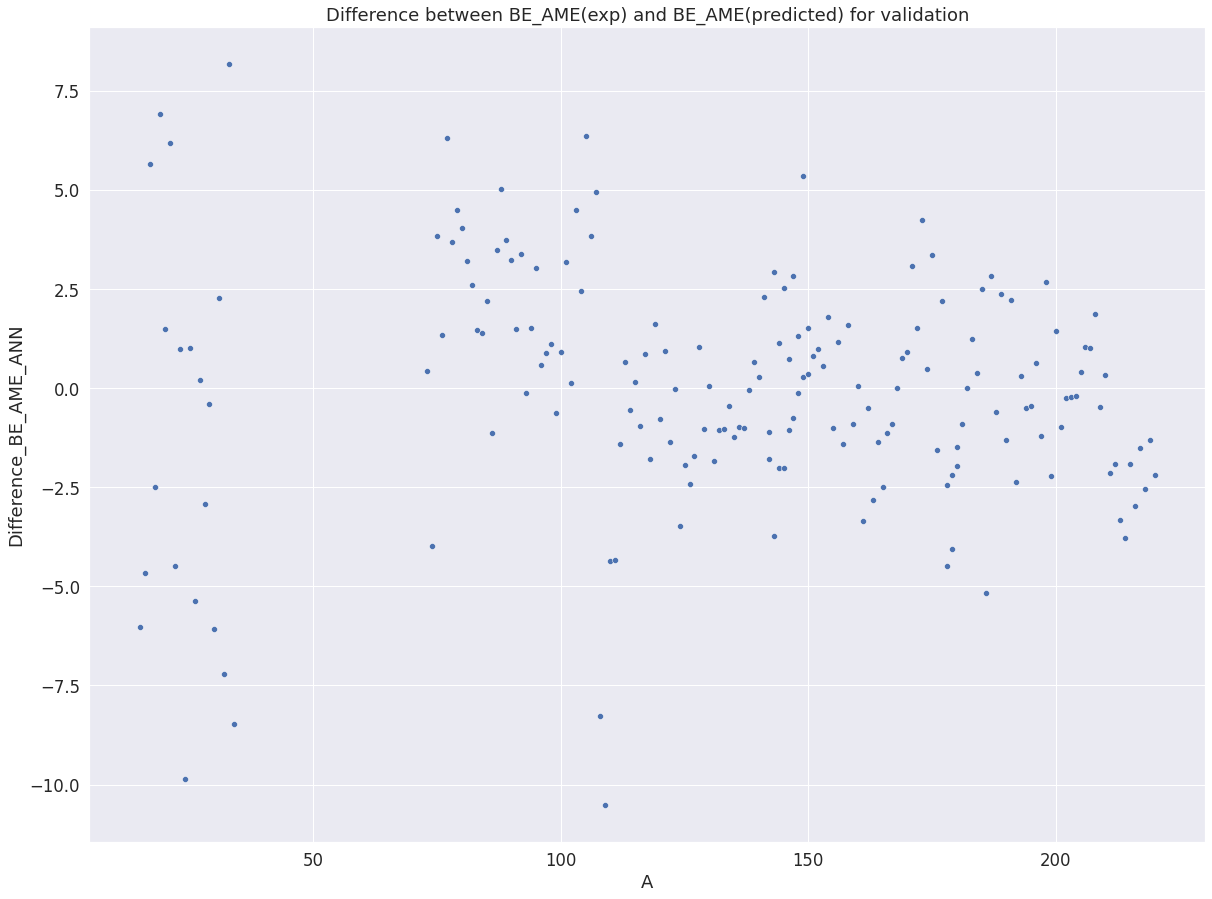

In [69]:
validation_predictions = model4.predict(x=([test_n_input, test_z_input, test_surf_input, test_coul_input, test_asym_input, test_pair_input, test_n_parity_input, test_z_parity_input, test_n_distance_input, test_z_distance_input]), batch_size=0)

validation_rescaled_predictions = [ (i - scaler.min_)/scaler.scale_ for i in validation_predictions]

validation_data["BE_Predictions"] = np.double(validation_rescaled_predictions)
validation_data["Difference_BE_AME_ANN"] = validation_data["ame_BE"] - validation_data["BE_Predictions"]


plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=validation_data, palette="rainbow_r")

In [70]:
rms_validation = np.sqrt(((validation_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(validation_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_validation)

RMS AME: 2.964826742877885


### We save the predictions into .csv and we will plot them on another notebook

In [71]:
train_final_csv = train_data.to_csv(join(project_path,"final_data/train_final_data.csv"),sep=";")
validation_final_csv = validation_data.to_csv(join(project_path,"final_data/validation_final_data.csv"),sep=";")